## ANALYSIS OF WESTBOUND TRAFFIC ON I-94 INTERSTATE HIGHWAY AT MN DoT ATR STATION 301, ROUGHLY MIDWAY BETWEEN Minneapolis and St Paul, MN.

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. <<https://en.wikipedia.org/wiki/Interstate_94


Traffic Dataset for this analysis is available on UCI Machine Learning Repository.<<https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume and was made by John Hogue.

This dataset is the hourly count for westbound traffic volume(cars moving from east to west) from Minneapolis to St Paul from 2012-2018 at MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. **(Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018)**


#### ATTRIBUTES FOR EACH COLUMN
holiday Categorical US National holidays plus regional holiday, Minnesota State Fair

temp Numeric Average temp in kelvin

rain_1h Numeric Amount in mm of rain that occurred in the hour

snow_1h Numeric Amount in mm of snow that occurred in the hour

clouds_all Numeric Percentage of cloud cover

weather_main Categorical Short textual description of the current weather

weather_description Categorical Longer textual description of the current weather

date_time DateTime Hour of the data collected in local CST time

traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume


#### OBJECTIVE FOR ANALYSIS

To determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.



In [1]:
import pandas as pd
traffic_data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
#first five rows
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
#last five rows
traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
#general information on th entire dataset
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


###### CONCLUSION FROM DATAFRAME.INFO

1) There are no null sets(each columns has 48204 entries which is equivalent to the number of rows(48204) .hence each row in each column is filled for all columns)

2) There are 48204 rows and 9 columns

3) There are 3 float type columns,2 int type columns and 4 string/object type columns

4) the datetime column is an object type and must be change to datetime.

In [6]:
#When we use Matplotlib inside Jupyter, we also need to add the %matplotlib inline magic — this enables Jupyter to generate the graphs.

import matplotlib.pyplot as plt
%matplotlib inline

#### VISUALIZING THE TRAFFIC DISTRIBUTION OF THE TRAFFIC_VOLUME COLUMN

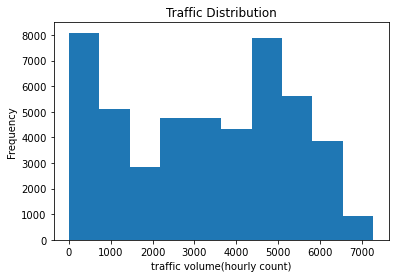

In [7]:
#this the overall traffic distribution of the entire stretch observed from 2012-2018 
traffic_data['traffic_volume'].plot.hist()
plt.title('Traffic Distribution')
plt.xlabel('traffic volume(hourly count)')
plt.show()

In [8]:
#Statistics for traffic_volume column
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### CONCLUSION FROM VISUALIZATION OF TRAFFIC_VOLUME COLUMN

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was almost four times as much (4993 cars or more)

nb the value at 75% is 4933 or less and above it is 25% ie 4993 or more(picture a cummulative cure and how is read)

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction:

#### DISTINGUISHING BETWEEN NIGTTIME AND DAYTIME DATA 

##### SIDE NOTE
1) TIME IS IN 24 HOUR FORMAT (1,2,3,4...,16,17,18,19,20,21,22,23)

2) for the first day the count started from 9:00am and ended at 23:00pm for the last day of the count

3)Each count is a 24hr count for each day except the first and last day



In [9]:
##### CONVERTING THE DATE_TIME COLUMN INTO A DATETIME OBJECT

traffic_data['date_time']=pd.to_datetime(traffic_data['date_time'])

In [10]:
#proof date_time column is now a datetime object
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [13]:
##### CREATING AN ADDITIONAL COLUMN TO THE traffic_data dataset.

traffic_data['hour']=traffic_data['date_time'].dt.hour

In [14]:
##### verification of new column addition (column number should be 10 now)
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [15]:
traffic_data['hour'].head(20)

0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
Name: hour, dtype: int64

In [80]:
# ISOLATING DAY TIME AND NIGHT TIME DATA
#day time is from 7am to 18:00 and night time is from 19:00 to 7am (24hrs)

day_time_data=traffic_data.loc[(traffic_data['hour']>=7)&(traffic_data['hour']<19)].copy()
night_time_data=traffic_data.loc[(traffic_data['hour']>=19)|(traffic_data['hour']<7)].copy()


In [48]:
day_time_data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [49]:
day_time_data.shape

(23877, 10)

In [50]:
night_time_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23


In [51]:
night_time_data.shape

(24327, 10)

In [52]:
#check that totals from two groups equals 48204, the total num of entries
day_time_data.shape[0]+night_time_data.shape[0]

48204

In [53]:
# This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 , you'll notice there's no data for two hours (4 and 5).
traffic_data.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361,3
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875,6


#### COMPARING TRAFFIC VOLUME FOR BOTH DAY AND NIGHT

(0.0, 8000.0)

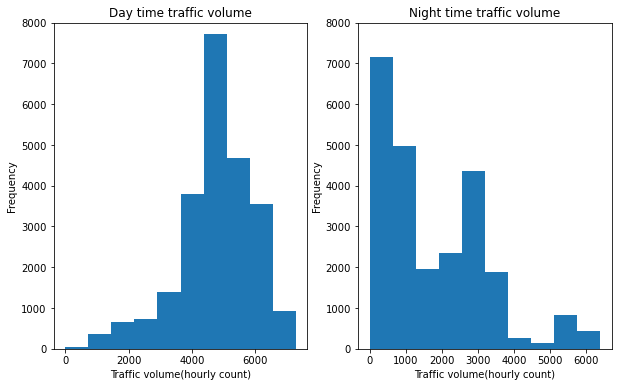

In [54]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
day_time_data['traffic_volume'].plot.hist()
plt.title('Day time traffic volume')
plt.xlabel('Traffic volume(hourly count)')
plt.ylim(0,8000)

plt.subplot(1,2,2)
night_time_data['traffic_volume'].plot.hist()
plt.title('Night time traffic volume')
plt.xlabel('Traffic volume(hourly count)')
plt.ylim(0,8000)



In [55]:
day_time_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [56]:
night_time_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### CONCLUSION FROM GRID CHART OF DAY AND NIGHT TIME TRAFFIC VOLUME HISTOGRAM
day_time_histogram is slightly left skewed, the frequency increases as the traffic volume increases. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

night_time_histogram is slightly right skewed, the frequency decreases as the traffic volume increases.with the exception of some hourly instances that a traffic volume of about 3000 is recoreded  4000 times at night. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward

thus more heavy traffic volume was observed at daytime compared to night time

### TIME INDICATORS

we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

### How Does Month Affect Traffic Volume?

In [57]:
#### EXTRACTING THE MONTH TO FORM A NEW COLUMN CALLED MONTH
day_time_data.shape

(23877, 10)

In [58]:
#Verifying addition of new column (except column number to be 11)
traffic_data.shape

(48204, 10)

In [59]:
day_time_data['date_time'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
48194     9
48195     9
48196     9
48197     9
48198     9
Name: date_time, Length: 23877, dtype: int64

In [60]:
day_time_data['month']=day_time_data['date_time'].dt.month

In [61]:
by_month=day_time_data.groupby('month').mean()
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
month,,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727,12.386774
2,266.663789,0.004019,0.000000,51.550459,4711.198394,12.351491
3,273.619940,0.015839,0.000000,56.827811,4889.409560,12.363933
4,279.661071,0.105343,0.000000,59.221525,4906.894305,12.492278
5,289.282668,0.130863,0.000000,56.548825,4911.121609,12.478300
6,294.576068,0.271121,0.000000,48.612374,4898.019566,12.425701
7,296.785052,4.412258,0.000000,42.176619,4595.035744,12.388141
8,295.119191,0.228113,0.000000,42.556892,4928.302035,12.387604
9,292.520287,0.289807,0.000000,45.184112,4870.783145,12.401503


In [62]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [63]:
by_month.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

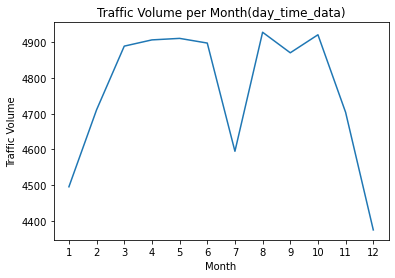

In [64]:
plt.plot(by_month.index,by_month['traffic_volume'])
plt.title('Traffic Volume per Month(day_time_data)')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(range(1,13))
plt.show()


##### CONCLUSION FROM LINE PLOT (TRAFFIC VOLUME BY MONTH)
The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

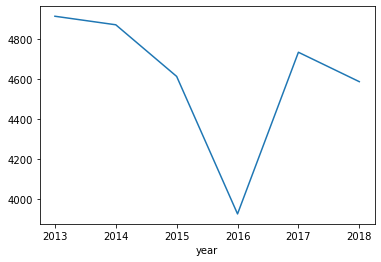

In [65]:
day_time_data['year'] = day_time_data['date_time'].dt.year
only_july = day_time_data[day_time_data['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

##### CONCLUSION FROM LINE PLOT(ONLY JULY-PER MONTH)
Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.<<https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.


### How Does Week Affect Traffic Volume?

In [66]:
#### EXTRACTING THE WEEK TO FORM A NEW COLUMN CALLED MONTH

day_time_data['date_time'].dt.dayofweek # 0 is Monday, 6 is Sunday


0        1
1        1
2        1
3        1
4        1
        ..
48194    6
48195    6
48196    6
48197    6
48198    6
Name: date_time, Length: 23877, dtype: int64

In [67]:
day_time_data['week']=day_time_data['date_time'].dt.dayofweek

In [68]:
day_time_data['week'].unique() # 0 is Monday, 6 is Sunday

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [69]:
by_dayofweek=day_time_data.groupby('week').mean()
by_dayofweek

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year
week,,,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,12.472732,6.401243,2015.524442
1,282.301770,0.129172,0.000194,52.333234,5189.004782,12.369994,6.458757,2015.582487
2,282.198316,0.068099,0.001091,53.662119,5284.454282,12.453411,6.619158,2015.491147
3,282.279115,0.172436,0.000148,53.993191,5311.303730,12.459739,6.501184,2015.484902
4,282.181216,0.092828,0.000225,51.412200,5291.600829,12.454545,6.575067,2015.514954
5,282.300646,0.107596,0.000094,50.446376,3927.249558,12.391573,6.498821,2015.527991
6,282.280340,0.133170,0.000000,52.288699,3436.541789,12.415244,6.604179,2015.444379


In [70]:
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

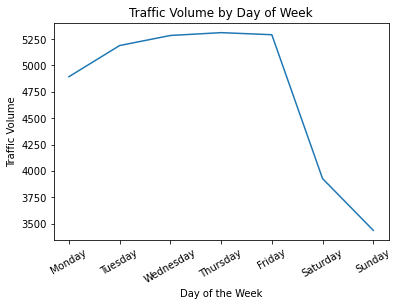

In [71]:
by_dayofweek['traffic_volume'].plot.line()
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume by Day of Week")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=30)
plt.show()

#### CONCLUSION FROM LINE PLOT (TRAFFIC VOLUME BY DAY OF WEEK)

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Traffic volume is highest during the week and lowest on Saturday and Sunday. The lowest volume day is Sunday. I will now break the data into weekday vs weekend to see how the traffic volume changes by hour through the day.

### How Does Time Affect Traffic Volume?( for weekend and weekday traffic volume seperately)

In [76]:
#0 is Monday, 6 is Sunday
weekend=day_time_data.loc[day_time_data['week']>4] 
weekday=day_time_data.loc[day_time_data['week']<=4]


In [77]:
weekend.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month,year,week
87,None,275.17,0.0,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,7,10,2012,5
88,None,274.99,0.0,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,8,10,2012,5
89,None,275.09,0.0,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,9,10,2012,5
90,None,276.88,0.0,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,10,2012,5
91,None,278.04,0.0,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,11,10,2012,5


In [88]:
weekend_group_by_hour=weekend.groupby('hour').mean()
weekend_group_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,week
hour,,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,2015.442053,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,2015.471761,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,2015.495667,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,2015.458763,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,2015.549550,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,2015.495495,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,2015.508137,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,2015.474453,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,2015.486239,5.506422


In [89]:
weekday_group_by_hour=weekday.groupby('hour').mean()
weekday_group_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,week
hour,,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,2015.562712,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,2015.493234,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,2015.548924,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,2015.526738,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,2015.528275,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,2015.550000,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,2015.514053,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,2015.501056,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,2015.509719,1.962563


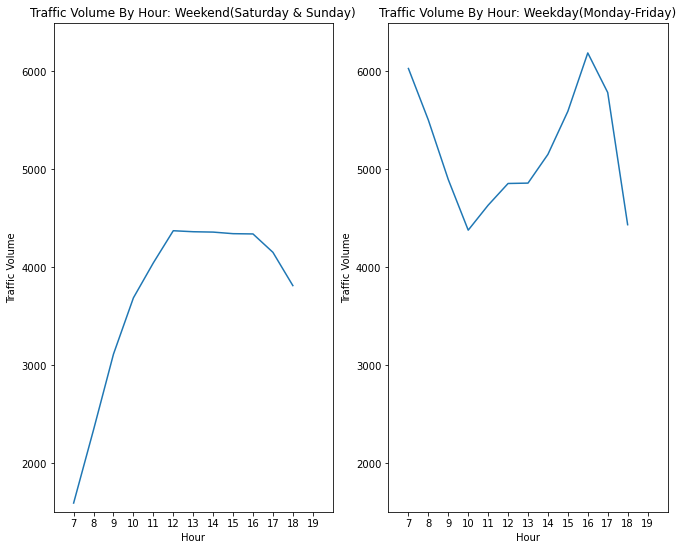

In [97]:
plt.figure(figsize=(11,9))

plt.subplot(1,2,1)
plt.plot(weekend_group_by_hour.index,weekend_group_by_hour['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend(Saturday & Sunday)')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(range(7,20))

plt.subplot(1,2,2)
plt.plot(weekday_group_by_hour.index,weekday_group_by_hour['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekday(Monday-Friday)')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(range(7,20))
plt.show()

##### CONCLUSION FOR TRAFFIC VOLUME BY HOUR LINE PLOTS

At each hour of the day, the traffic volume is generally higher during weekdays compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

### WEATHER INDICATORS

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [109]:
#### Checking how weather factors correlates with traffic volume

day_time_data.corr().loc['traffic_volume',['temp', 'rain_1h','snow_1h','clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

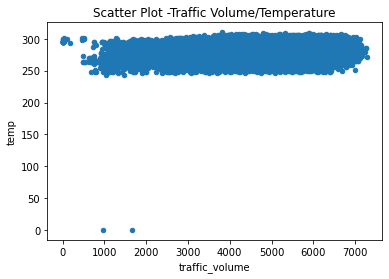

In [111]:
#Temperature has the strongest correlation with traffic volume amongst the numerical waether indicator columns. However this correlation is generally weak far from the perfect correlation of +1

day_time_data.plot.scatter(x='traffic_volume',y='temp')
plt.title('Scatter Plot -Traffic Volume/Temperature')
plt.show()

#### CONCLUSION FROM SCATTER PLOT
None of the numerical weather columns have a significant correlation to traffic volume. The highest correlation is temp which has a positive correlation of 0.128 but looking at the scatter plot above, it does not appear that this is a strong correlation that will indicate heavy traffic.

Before disregarding weather as an indicator altogether, lets take a deeper look at the two non-numeric columns: weather_main and weather_description.

In [117]:
weather_main_grouped=day_time_data.groupby('weather_main').mean()
weather_main_grouped

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
weather_main,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,12.153370


In [118]:
weather_descr_grouped=day_time_data.groupby('weather_description').mean()
weather_descr_grouped

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
weather_description,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,12.275862


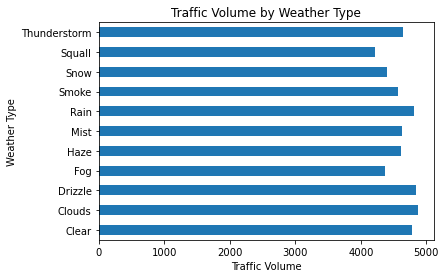

In [127]:
weather_main_grouped['traffic_volume'].plot.barh()
plt.title("Traffic Volume by Weather Type")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Type")
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult.

The weather patterns with the highest traffic volume are Clouds, Drizzle, and Rain. Interestingly, however, there is not much difference between the weather events in terms of traffic volume. Volume remains high regardless of weather suggesting that time is more important that what is happening outside.

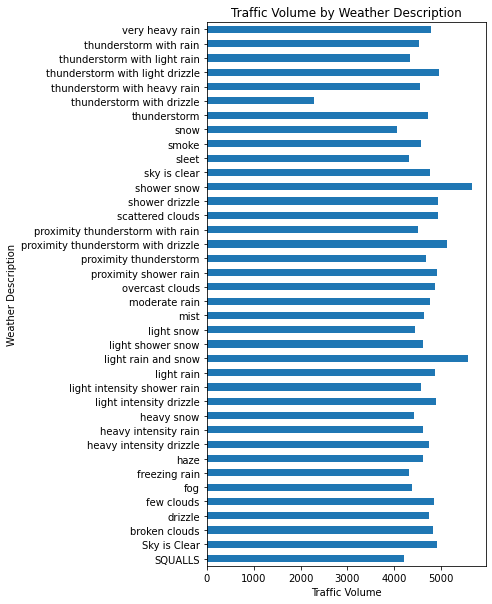

In [128]:
weather_descr_grouped['traffic_volume'].plot.barh(figsize=(5,10))
plt.xlabel ("Traffic Volume")
plt.ylabel ("Weather Description")
plt.title ("Traffic Volume by Weather Description")
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle

Considering the more detailed weather descriptions here, we can see that the two highest volume weather events are similar: light rain and snow and shower snow. To amend the previous observations. It does look like a combination of snow and rain may indicate higher traffic volume.



## OVERALL CONCLUSION

The highest indicator of high traffic volume was time. Traffic volume is highest:

1) In the daytime

2) On weekdays (Monday - Friday)

3) During rush hour (before 8am and around 16:00pm)

4) During the Spring - Fall (with exception of July)

There is also some indication that weather events involving both rain and snow may also increase traffic volumes. Beyond that, weather does not seem to have as large of an affect on traffic volume as time of day.